# 🧠 Logistic Regression for Binary Classification

## 🎯 Objective:
To build and evaluate a binary classification model using **Logistic Regression**. This task aims to identify key features, evaluate model performance, and interpret decision thresholds using sigmoid probability outputs.

## 📦 Tools & Libraries:
- **Scikit-learn**: Model training and evaluation
- **Pandas**: Data handling
- **Matplotlib/Seaborn**: Visualizations

## 📁 Dataset Overview:
This project uses a binary classification dataset where the target variable represents a binary outcome. Our goal is to predict this target using logistic regression.


Section 2: Dataset Overview


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('data.csv')  # Update path as needed
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## 📄 Dataset Overview

We begin with an inspection of the dataset’s structure, including:
- Number of rows and columns
- Data types of each column
- Any missing values
- Summary statistics of numerical features


In [ ]:
# Data overview
print("Shape:", df.shape)
print("Columns:", df.columns)
df.info()
df.describe()
df.isnull().sum()


Shape: (569, 33)
Columns: Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


# **Section 3: Key Features Identification**
## 🔍 Key Features Identification

At this stage, we:
- Explore the target distribution to ensure it's a binary classification problem
- Visualize feature correlations
- Detect any dominant or redundant features



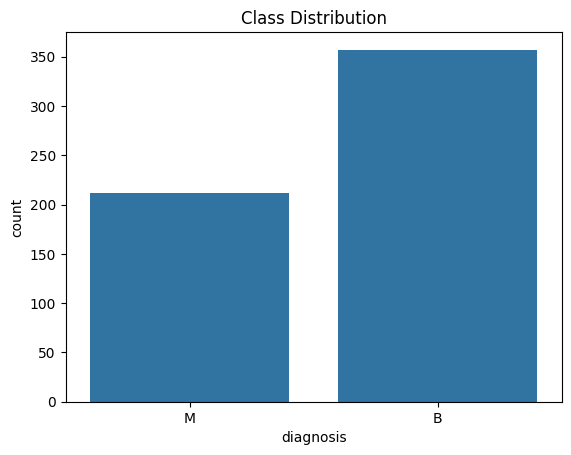

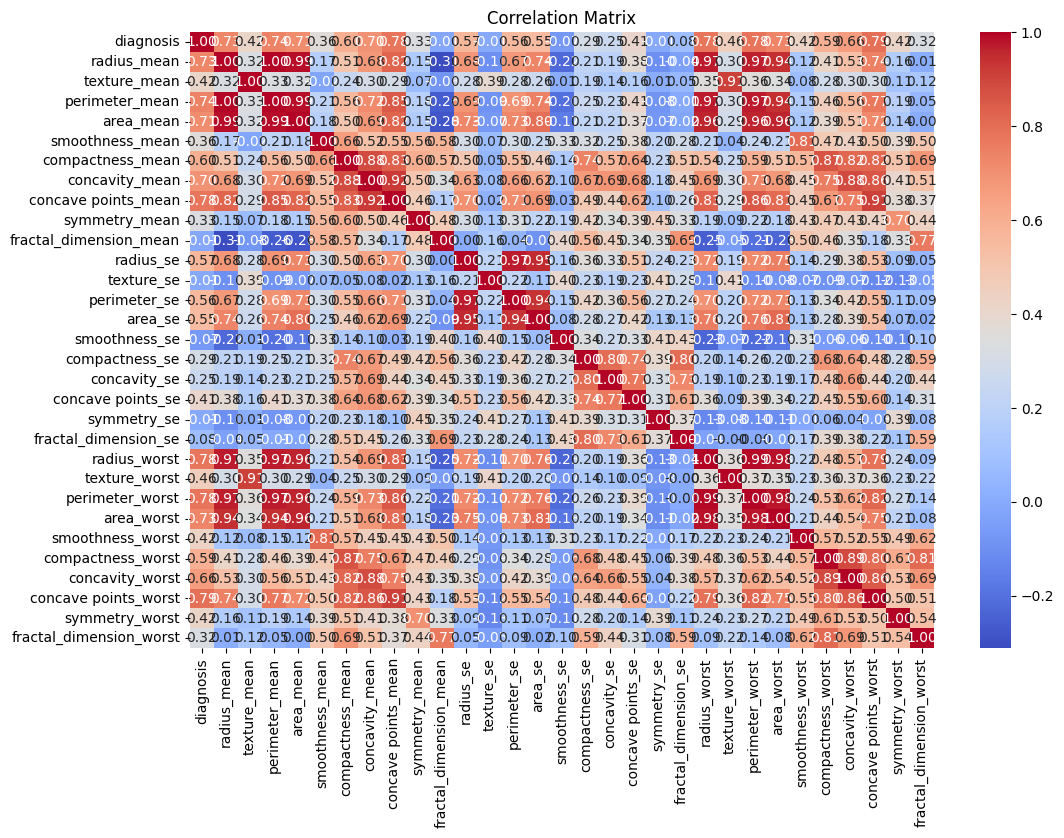

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Target distribution
sns.countplot(x='diagnosis', data=df)
plt.title("Class Distribution")
plt.show()

# Convert 'diagnosis' to numerical
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Drop irrelevant columns before calculating correlation
df_corr = df.drop(['id', 'Unnamed: 32'], axis=1)

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# **Section 4: Data Preprocessing**
## 🧹 Data Preprocessing

This includes:
- Separating features and labels
- Train-test split to prevent data leakage
- Standardizing the features using StandardScaler


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and labels using 'diagnosis' as the target
X = df.drop(['diagnosis', 'Unnamed: 32'], axis=1)
y = df['diagnosis']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Section 5: Model Building - Logistic Regression**
## 🏗️ Model Building: Logistic Regression

We now fit a Logistic Regression model and analyze the coefficients, which indicate how strongly each feature impacts the prediction.


In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Coefficients
print("Feature Coefficients:")
for feat, coef in zip(X.columns, logreg.coef_[0]):
    print(f"{feat}: {coef:.4f}")


Feature Coefficients:
id: 0.2063
radius_mean: 0.4300
texture_mean: 0.4037
perimeter_mean: 0.3907
area_mean: 0.4623
smoothness_mean: 0.0206
compactness_mean: -0.5256
concavity_mean: 0.7978
concave points_mean: 1.1387
symmetry_mean: -0.2351
fractal_dimension_mean: -0.0568
radius_se: 1.2846
texture_se: -0.1683
perimeter_se: 0.6234
area_se: 0.9025
smoothness_se: 0.2168
compactness_se: -0.6908
concavity_se: -0.1855
concave points_se: 0.3066
symmetry_se: -0.4644
fractal_dimension_se: -0.6523
radius_worst: 0.8664
texture_worst: 1.3311
perimeter_worst: 0.5746
area_worst: 0.8279
smoothness_worst: 0.5946
compactness_worst: -0.0180
concavity_worst: 0.9510
concave points_worst: 0.7925
symmetry_worst: 1.1853
fractal_dimension_worst: 0.1785


# **Section 6: Model Evaluation**
## 📊 Model Evaluation

We evaluate using multiple metrics:
- **Confusion Matrix**
- **Precision, Recall, F1 Score, Accuracy**
- **ROC Curve and AUC**


Confusion Matrix:
[[70  1]
 [ 2 41]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy: 0.9736842105263158
Precision: 0.9761904761904762
Recall: 0.9534883720930233
F1 Score: 0.9647058823529412


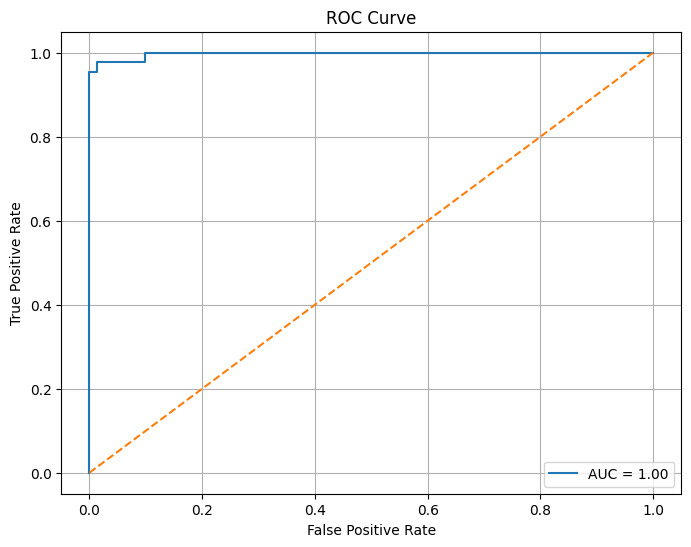

In [ ]:
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, classification_report,
    roc_curve, roc_auc_score
)

y_pred = logreg.predict(X_test_scaled)
y_proba = logreg.predict_proba(X_test_scaled)[:, 1]

# Metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


# **Section 7: Threshold Tuning**
## 🎚️ Threshold Tuning and Sigmoid Explanation

Logistic regression outputs probabilities. By default, it classifies based on a 0.5 threshold. Adjusting this threshold can help balance precision and recall.

### 📉 Sigmoid Function:
The sigmoid function outputs values between 0 and 1, representing predicted probabilities.


Custom Threshold (0.4) Evaluation:
[[70  1]
 [ 1 42]]
Precision: 0.9767441860465116
Recall: 0.9767441860465116


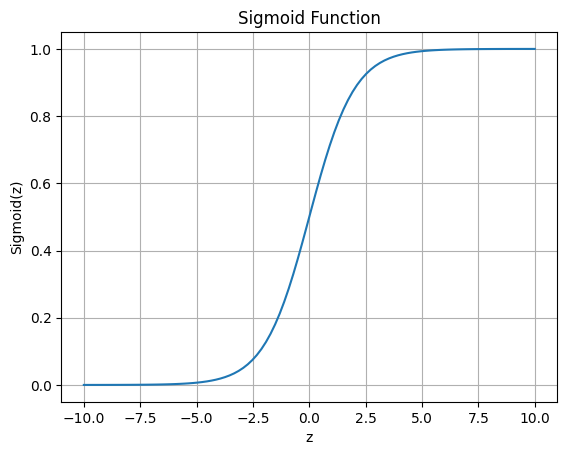

In [ ]:
# Adjust threshold
custom_thresh = 0.4
y_pred_thresh = (y_proba >= custom_thresh).astype(int)

print(f"Custom Threshold ({custom_thresh}) Evaluation:")
print(confusion_matrix(y_test, y_pred_thresh))
print("Precision:", precision_score(y_test, y_pred_thresh))
print("Recall:", recall_score(y_test, y_pred_thresh))

# Sigmoid plot
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z_vals = np.linspace(-10, 10, 100)
sig_vals = sigmoid(z_vals)

plt.plot(z_vals, sig_vals)
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("Sigmoid(z)")
plt.grid()
plt.show()


# **Section 8: Observations & Interpretation**
## 📝 Observations

- **Key Features**: Features with the largest coefficients contribute most to the outcome.
- **Model Performance**: AUC close to 1 suggests high discriminative ability.
- **Class Balance**: If one class is dominant, precision-recall trade-off becomes critical.
- **Threshold Tuning**: Adjusting threshold improves recall or precision based on use-case.

## 🔚 Conclusion

Logistic Regression is an interpretable, efficient baseline model for binary classification. This analysis sets the foundation for advanced models like Random Forest or XGBoost in future tasks.

